<a href="https://colab.research.google.com/github/JinzhiT/project-1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
total = sum(i for i in range(1000) if i % 3 == 0 or i % 5 == 0)
print(total)

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [4]:
# === Project1.ipynb Regression Analysis (fetch_california_housing; no 'squared' kwarg) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1) Load dataset (works across sklearn versions)
try:
    housing = fetch_california_housing(as_frame=True)
    df = housing.frame
except TypeError:
    data = fetch_california_housing()
    X_tmp = pd.DataFrame(data.data, columns=data.feature_names)
    y_tmp = pd.Series(data.target, name="MedHouseVal")
    df = pd.concat([X_tmp, y_tmp], axis=1)

# 2) Split
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

def metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        # RMSE without using the 'squared' keyword (for older sklearn)
        "RMSE": float(np.sqrt(mean_squared_error(y_true, y_pred))),
    }

# 3) Models
linreg = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=300, random_state=0, n_jobs=-1).fit(X_train, y_train)
gbr = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

# 4) Metrics
lin_train = metrics(y_train, linreg.predict(X_train)); lin_test = metrics(y_test, linreg.predict(X_test))
rf_train  = metrics(y_train, rf.predict(X_train));    rf_test  = metrics(y_test,  rf.predict(X_test))
gbr_train = metrics(y_train, gbr.predict(X_train));   gbr_test = metrics(y_test, gbr.predict(X_test))

# 5) Pick best by Test R^2
preds = {
    "Linear": linreg.predict(X_test),
    "RandomForest": rf.predict(X_test),
    "GradientBoosting": gbr.predict(X_test),
}
best_name = max(preds, key=lambda k: r2_score(y_test, preds[k]))
best_pred = preds[best_name]
best_model = {"Linear": linreg, "RandomForest": rf, "GradientBoosting": gbr}[best_name]

# 6) Plots
plt.figure(figsize=(6,6))
plt.scatter(y_test, best_pred, alpha=0.3)
lims = [min(y_test.min(), best_pred.min()), max(y_test.max(), best_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("True Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title(f"Predicted vs True ({best_name})")
plt.savefig("scatter_pred_true.png", bbox_inches="tight", dpi=150)
plt.close()

errors = best_pred - y_test
plt.figure(figsize=(6,4))
plt.hist(errors, bins=40, edgecolor="black")
plt.xlabel("Prediction Error ($100,000s)")
plt.ylabel("Frequency")
plt.title(f"Error Histogram ({best_name})")
plt.savefig("error_histogram.png", bbox_inches="tight", dpi=150)
plt.close()

# 7) Summaries
summary = pd.DataFrame({
    ("Linear","Train"): lin_train, ("Linear","Test"): lin_test,
    ("RandomForest","Train"): rf_train, ("RandomForest","Test"): rf_test,
    ("GradientBoosting","Train"): gbr_train, ("GradientBoosting","Test"): gbr_test
}).T
print("\nRegression metrics (R2, MAE, RMSE):")
print(summary.round(3))

# 8) Feature importance (for report)
if hasattr(best_model, "feature_importances_"):
    importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
else:
    scaler = StandardScaler().fit(X_train)
    Xs = scaler.transform(X_train)
    coef = LinearRegression().fit(Xs, y_train).coef_
    importances = pd.Series(np.abs(coef), index=X.columns).sort_values(ascending=False)

print("\nFeature importance (best model):")
print(importances.round(4))



Regression metrics (R2, MAE, RMSE):
                           R2    MAE   RMSE
Linear           Train  0.609  0.531  0.723
                 Test   0.594  0.535  0.727
RandomForest     Train  0.974  0.121  0.187
                 Test   0.800  0.334  0.511
GradientBoosting Train  0.803  0.359  0.514
                 Test   0.777  0.374  0.539

Feature importance (best model):
MedInc        0.5303
AveOccup      0.1346
Latitude      0.0852
Longitude     0.0842
HouseAge      0.0555
AveRooms      0.0469
Population    0.0329
AveBedrms     0.0303
dtype: float64


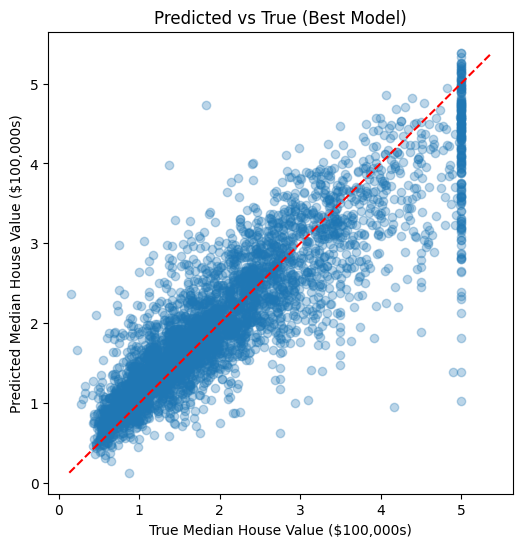

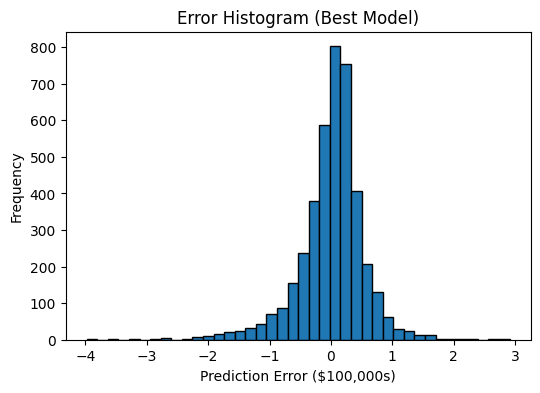

In [5]:
import matplotlib.pyplot as plt

# choose the best model, e.g. Gradient Boosting
best_pred = gbr.predict(X_test)   # or rf.predict(X_test), linreg.predict(X_test)

# --- Scatter plot: Predicted vs True ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, best_pred, alpha=0.3)
lims = [min(y_test.min(), best_pred.min()), max(y_test.max(), best_pred.max())]
plt.plot(lims, lims, 'r--')
plt.xlabel("True Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.title("Predicted vs True (Best Model)")
plt.savefig("scatter_pred_true.png", dpi=150, bbox_inches="tight")
plt.show()

# --- Error histogram ---
errors = best_pred - y_test
plt.figure(figsize=(6,4))
plt.hist(errors, bins=40, edgecolor="black")
plt.xlabel("Prediction Error ($100,000s)")
plt.ylabel("Frequency")
plt.title("Error Histogram (Best Model)")
plt.savefig("error_histogram.png", dpi=150, bbox_inches="tight")
plt.show()


# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here